In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline
sns.set(style="whitegrid")

# Para exibir todas as linhas do DataFrame
pd.set_option('display.max_rows', None)

In [23]:
# Definição do diretório onde estão salvos os resultados
save_dir = os.path.join(os.getcwd(), 'experiment_final2')

# Verifica se o diretório existe
if not os.path.exists(save_dir):
    raise FileNotFoundError(f"O diretório {save_dir} não foi encontrado.")

# Lista todas as subpastas no diretório principal
subfolders = [f.path for f in os.scandir(save_dir) if f.is_dir()]

# Função para extrair o tipo de máquina e ID a partir do nome da subpasta
def extract_machine_info(subfolder_name):
    """
    Extrai o tipo de máquina e o ID a partir do nome da subpasta.
    Exemplo: 'FAN_00' -> ('fan', '00')
    """
    match = re.match(r'^(fan|pump|slider|valve)_(\d+)$', subfolder_name.lower())
    if match:
        return match.group(1), match.group(2)
    else:
        return 'unknown', 'unknown'

# Carrega todos os CSVs em um único DataFrame com colunas adicionais para o tipo de máquina e ID
df_list = []
for subfolder in subfolders:
    subfolder_name = os.path.basename(subfolder)
    machine_type, machine_id = extract_machine_info(subfolder_name)
    
    if machine_type == 'unknown':
        print(f"Ignorando a subpasta desconhecida: {subfolder_name}")
        continue
    
    # Lista todos os arquivos CSV na subpasta atual
    csv_files = [file for file in os.listdir(subfolder) if file.endswith('.csv')]
    
    if not csv_files:
        print(f"Nenhum arquivo CSV encontrado na subpasta: {subfolder_name}")
        continue
    
    for file in csv_files:
        file_path = os.path.join(subfolder, file)
        try:
            df = pd.read_csv(file_path)
            df['machine_type'] = machine_type
            df['machine_id'] = machine_id
            df_list.append(df)
        except Exception as e:
            print(f"Erro ao ler o arquivo {file_path}: {e}")
            continue

# Concatena todos os DataFrames
df_all = pd.concat(df_list, ignore_index=True)

Ignorando a subpasta desconhecida: confidence_interval_FAN_00
Ignorando a subpasta desconhecida: confidence_interval_SLIDER_00
Ignorando a subpasta desconhecida: confidence_interval_VALVE_00
Ignorando a subpasta desconhecida: confidence_interval_PUMP_00


In [24]:
# Verifica os tipos de máquinas disponíveis
machine_types = df_all['machine_type'].unique()
print(f"Tipos de máquinas encontrados: {machine_types}")

# Valores únicos de max_samples e n_estimators
max_samples_values = sorted(df_all['max_samples'].unique())
n_estimators_values = sorted(df_all['n_estimators'].unique())

# Agrupa os dados por 'machine_type', 'max_samples' e 'n_estimators' e calcula a média da AUC_ROC
df_mean_auc = df_all.groupby(['machine_type', 'max_samples', 'n_estimators'])['AUC_ROC'].mean().reset_index()

# Renomeia a coluna para refletir que é a média
df_mean_auc = df_mean_auc.rename(columns={'AUC_ROC': 'Mean_AUC_ROC'})

# Exibe o DataFrame completo com as médias
print("DataFrame com a média da AUC ROC por combinação de parâmetros:")
display(df_mean_auc)

# Salva o DataFrame com as médias em um novo CSV
#mean_auc_csv = os.path.join(save_dir, 'mean_auc_roc_by_machine.csv')
#df_mean_auc.to_csv(mean_auc_csv, index=False)
#print(f"DataFrame com médias salvo em: {mean_auc_csv}")

Tipos de máquinas encontrados: ['valve' 'pump' 'fan' 'slider']
DataFrame com a média da AUC ROC por combinação de parâmetros:


,machine_type,max_samples,n_estimators,Mean_AUC_ROC
0,fan,128,2,0.505455
1,fan,128,10,0.548722
2,fan,128,40,0.602360
3,fan,128,70,0.615314
4,fan,128,100,0.617837
5,fan,512,2,0.529535
6,fan,512,10,0.549517
7,fan,512,40,0.595680
8,fan,512,70,0.619326
9,fan,512,100,0.620057


Heatmap salvo em: /data/joao/mtsa/experiment_final2/heatmaps2/heatmap_valve.png


/tmp/ipykernel_1485759/1881741241.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  heatmap_data.applymap(lambda x: np.floor(x * 100) / 100 if not pd.isna(x) else np.nan),
/tmp/ipykernel_1485759/1881741241.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot=heatmap_data.applymap(lambda x: f"{np.floor(x * 100) / 100:.2f}" if not pd.isna(x) else ""),


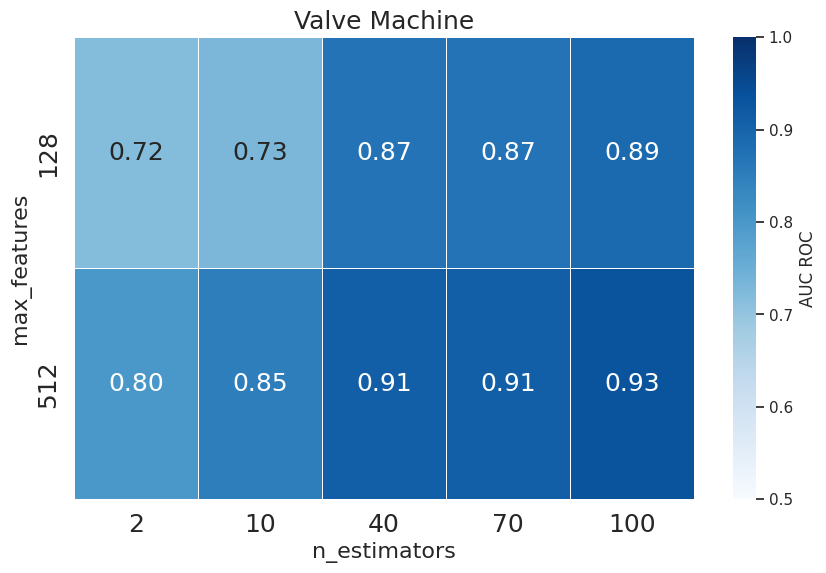

/tmp/ipykernel_1485759/1881741241.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  heatmap_data.applymap(lambda x: np.floor(x * 100) / 100 if not pd.isna(x) else np.nan),
/tmp/ipykernel_1485759/1881741241.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot=heatmap_data.applymap(lambda x: f"{np.floor(x * 100) / 100:.2f}" if not pd.isna(x) else ""),


Heatmap salvo em: /data/joao/mtsa/experiment_final2/heatmaps2/heatmap_pump.png


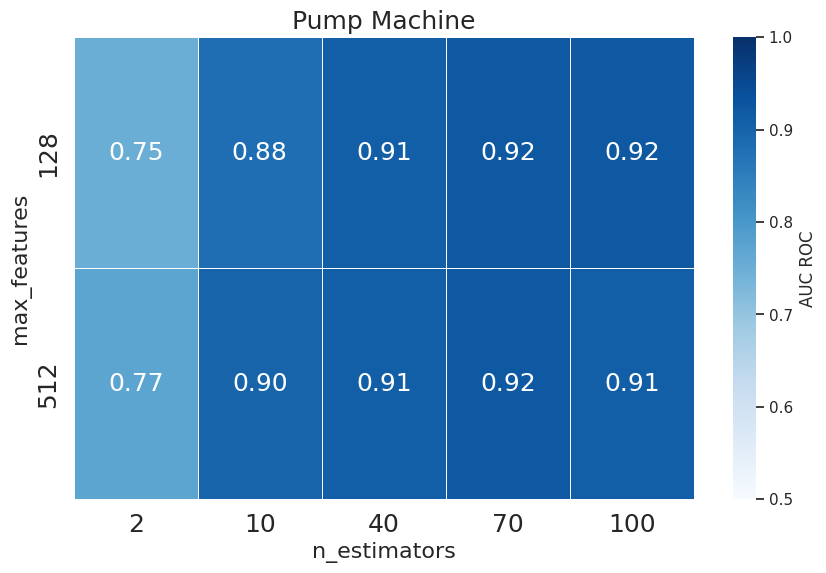

/tmp/ipykernel_1485759/1881741241.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  heatmap_data.applymap(lambda x: np.floor(x * 100) / 100 if not pd.isna(x) else np.nan),
/tmp/ipykernel_1485759/1881741241.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot=heatmap_data.applymap(lambda x: f"{np.floor(x * 100) / 100:.2f}" if not pd.isna(x) else ""),


Heatmap salvo em: /data/joao/mtsa/experiment_final2/heatmaps2/heatmap_fan.png


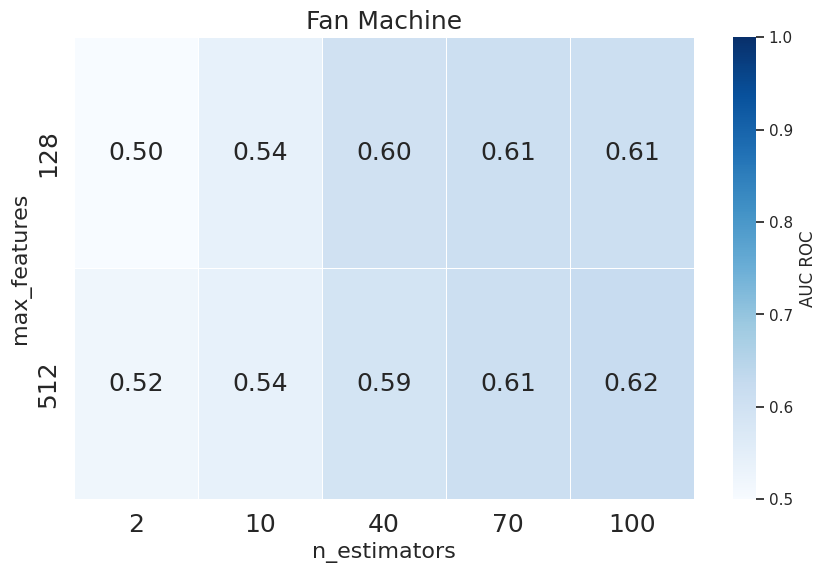

/tmp/ipykernel_1485759/1881741241.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  heatmap_data.applymap(lambda x: np.floor(x * 100) / 100 if not pd.isna(x) else np.nan),
/tmp/ipykernel_1485759/1881741241.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot=heatmap_data.applymap(lambda x: f"{np.floor(x * 100) / 100:.2f}" if not pd.isna(x) else ""),


Heatmap salvo em: /data/joao/mtsa/experiment_final2/heatmaps2/heatmap_slider.png


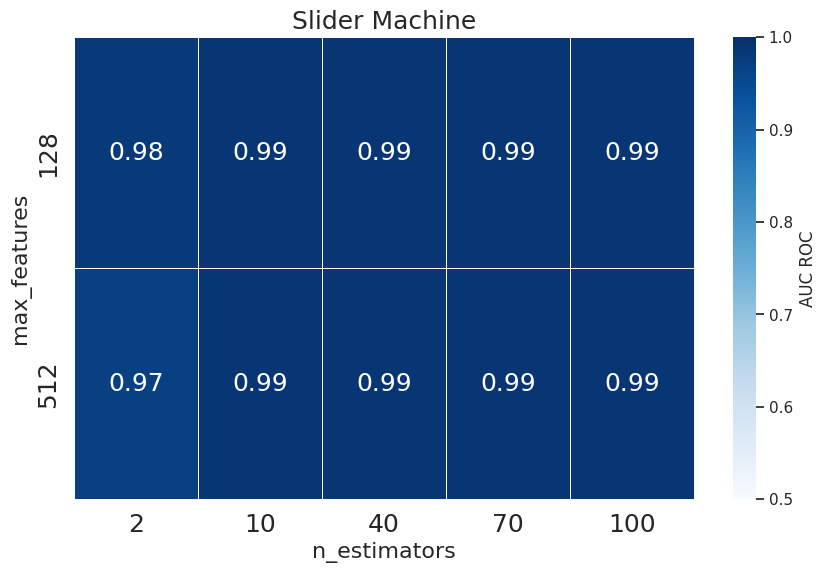

In [25]:
# Cria uma pasta para salvar os heatmaps, se não existir
heatmap_dir = os.path.join(save_dir, 'heatmaps2')
os.makedirs(heatmap_dir, exist_ok=True)

# Limites fixos para o colorbar
vmin = 0.5
vmax = 1.0

# Loop sobre cada tipo de máquina
for machine in machine_types:
    if machine == 'unknown':
        print("Ignorando arquivos com tipo de máquina desconhecido.")
        continue
    
    # Filtra os dados para o tipo de máquina atual
    df_machine = df_mean_auc[df_mean_auc['machine_type'] == machine]
    
    # Verifica se há dados suficientes para plotar
    if df_machine.empty:
        print(f"Nenhum dado disponível para a máquina {machine}.")
        continue
    
    # Pivot do DataFrame para criar uma matriz adequada para o heatmap
    heatmap_data = df_machine.pivot(index='max_samples', columns='n_estimators', values='Mean_AUC_ROC')
    
    # Ordena os índices e colunas para garantir a ordem correta
    heatmap_data = heatmap_data.reindex(index=max_samples_values, columns=n_estimators_values)
    
    # Configura o tamanho do gráfico
    plt.figure(figsize=(10, 6))
    
    # Cria o heatmap usando seaborn
    sns.heatmap(
        heatmap_data.applymap(lambda x: np.floor(x * 100) / 100 if not pd.isna(x) else np.nan),  
        annot=heatmap_data.applymap(lambda x: f"{np.floor(x * 100) / 100:.2f}" if not pd.isna(x) else ""),  
        fmt="", cmap="Blues", cbar_kws={'label': 'AUC ROC'}, 
        linewidths=.5, 
        annot_kws={"fontsize": 18},  # Tamanho da fonte dos valores
        vmin=vmin,  
        vmax=vmax)
    
    # Títulos e labels
    plt.title(f'{machine.capitalize()} Machine', fontsize=18)
    plt.xlabel('n_estimators', fontsize=16)
    plt.ylabel('max_features', fontsize=16)
    plt.xticks(fontsize=18)  # Tamanho da fonte dos valores do eixo X
    plt.yticks(fontsize=18)  # Tamanho da fonte dos valores do eixo Y
    
    # Salva o heatmap como imagem
    heatmap_path = os.path.join(heatmap_dir, f'heatmap_{machine}.png')
    plt.savefig(heatmap_path, bbox_inches='tight')
    print(f'Heatmap salvo em: {heatmap_path}')
    
    # Exibe o gráfico
    plt.show()
